# Diseño inicial de unidad didáctica sobre regresión lineal ordinaria

### Objetivos
* Mostrar la potencialidad de Pandas para el procesamiento de un dataset. 
* Verificar que cuando se aumenta la cantidad de características se tiende a tener overfitting (Muller, página 50) y un bajo rendimiento en los datos de testeo. 
* Mostrar las representaciones geométricas de la regresión lineal para 1 y 2 características.
* Mostrar que el aumento dimensional (aumento del número de características) mejora el ajuste sobre los datos de entrenamiento.  
* Verificar que la dimensión del problema de regresión es un problema para la modelación. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 

In [2]:
df = pd.read_csv('USA_Covid_Data.csv') 
df.head(1)   

,State,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1 mil population,Death/1 mil population,Total Cases.1,Tests/1 mil population,Population
0,California,"3,803,789","63,190","2,065,555","1,675,044","96,269","1,599","67,789,152","1,715,650","39,512,223"


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
State                           50 non-null object
Total Cases                     50 non-null object
Total Deaths                    50 non-null object
Total Recovered                 44 non-null object
Active Cases                    44 non-null object
Total Cases/1 mil population    50 non-null object
Death/1 mil population          50 non-null object
Total Cases.1                   50 non-null object
Tests/1 mil population          50 non-null object
Population                      50 non-null object
dtypes: object(10)
memory usage: 4.0+ KB


In [24]:
df.shape 

(50, 6)

In [4]:
df.keys() 
  

Index(['State', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Total Cases/1 mil population',
       'Death/1 mil population', 'Total Cases.1', 'Tests/1 mil population',
       'Population'],
      dtype='object')

In [5]:
df['Total Recovered'].replace({None:0}, inplace = True) 
df['Active Cases'].replace({None:0}, inplace = True) 

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
State                           50 non-null object
Total Cases                     50 non-null object
Total Deaths                    50 non-null object
Total Recovered                 50 non-null object
Active Cases                    50 non-null object
Total Cases/1 mil population    50 non-null object
Death/1 mil population          50 non-null object
Total Cases.1                   50 non-null object
Tests/1 mil population          50 non-null object
Population                      50 non-null object
dtypes: object(10)
memory usage: 4.0+ KB


In [7]:
df.drop(['State','Total Cases/1 mil population', 
         'Death/1 mil population', 'Tests/1 mil population'], axis = 1, inplace = True)

In [8]:
df.replace({',':''}, regex = True, inplace = True) 
df.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases.1,Population
0,3803789,63190,2065555,1675044,67789152,39512223
1,2979334,52169,2871132,56033,31072035,28995881
2,2346153,37265,2009593,299295,30196902,21477737
3,2163931,53876,1822940,287115,57462737,19453561
4,1387760,25490,1332924,29346,25185883,12671821


In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
Total Cases        50 non-null object
Total Deaths       50 non-null object
Total Recovered    50 non-null object
Active Cases       50 non-null object
Total Cases.1      50 non-null object
Population         50 non-null object
dtypes: object(6)
memory usage: 2.5+ KB


In [10]:
for key in df.keys():
    df[key] = df[key].astype('int64') 

In [11]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
Total Cases        50 non-null int64
Total Deaths       50 non-null int64
Total Recovered    50 non-null int64
Active Cases       50 non-null int64
Total Cases.1      50 non-null int64
Population         50 non-null int64
dtypes: int64(6)
memory usage: 2.5 KB


In [12]:
media_1 = df['Total Recovered'].values.sum()/44

In [13]:
media_2 = df['Active Cases'].values.sum()/44

In [14]:
df.describe() 

,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases.1,Population
count,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,6.670756e+05,11942.620000,5.181720e+05,9.704058e+04,9.770832e+06,6.550675e+06
std,7.515843e+05,14076.884542,6.264768e+05,2.616604e+05,1.312065e+07,7.389282e+06
min,2.433100e+04,256.000000,0.000000e+00,0.000000e+00,4.433020e+05,5.787590e+05
25%,1.963750e+05,2422.750000,7.184400e+04,1.241750e+03,2.800586e+06,1.827712e+06
50%,4.581045e+05,7339.500000,3.085180e+05,6.808000e+03,5.066902e+06,4.558234e+06
75%,8.361968e+05,13632.500000,8.185410e+05,5.353875e+04,1.065243e+07,7.530849e+06
max,3.803789e+06,63190.000000,2.871132e+06,1.675044e+06,6.778915e+07,3.951222e+07


In [15]:
df['Total Recovered'].replace({0:media_1}, inplace = True) 
df['Active Cases'].replace({0:media_2}, inplace = True) 

In [16]:
df.describe() 

,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases.1,Population
count,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,6.670756e+05,11942.620000,5.888318e+05,1.102734e+05,9.770832e+06,6.550675e+06
std,7.515843e+05,14076.884542,5.959128e+05,2.591445e+05,1.312065e+07,7.389282e+06
min,2.433100e+04,256.000000,9.358000e+03,1.750000e+02,4.433020e+05,5.787590e+05
25%,1.963750e+05,2422.750000,1.309892e+05,2.811500e+03,2.800586e+06,1.827712e+06
50%,4.581045e+05,7339.500000,4.424095e+05,2.285850e+04,5.066902e+06,4.558234e+06
75%,8.361968e+05,13632.500000,8.185410e+05,1.102734e+05,1.065243e+07,7.530849e+06
max,3.803789e+06,63190.000000,2.871132e+06,1.675044e+06,6.778915e+07,3.951222e+07


### pandas.DataFrame.astype


`DataFrame.astype(dtype, copy=True, errors='raise')`

Cast a pandas object to a specified dtype dtype.



Trasforma un objeto pandas a un dtype especificado. 

[pandas.isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) 

[pandas.DataFrame.replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [17]:
y = df['Total Deaths'].values
# int para menos requerimiento de recursos computacionales
y[:3] 

array([63190, 52169, 37265], dtype=int64)

In [18]:
X1 = df['Population'].values.reshape(-1,1)
X1[:3,:]

array([[39512223],
       [28995881],
       [21477737]], dtype=int64)

# Modelo de regresión lineal ordenaria con una característica

In [19]:
y = df['Total Deaths'].values
X1 = df['Population'].values.reshape(-1,1) 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
X_train,X_test,y_train,y_test = train_test_split(X1,y, random_state=702) 
reg_1 = LinearRegression()
reg_1.fit(X_train,y_train) 
reg_1.score(X_train, y_train),reg_1.score(X_test, y_test) 

(0.9257331156288036, 0.763061618529375)

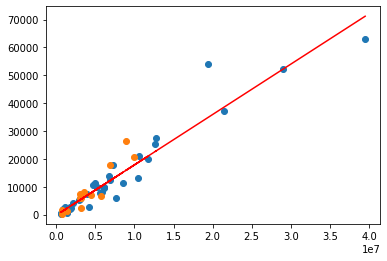

In [20]:
plt.scatter(X_train,y_train) 
plt.scatter(X_test,y_test) 
plt.plot(X1, reg_1.coef_*X1 + reg_1.intercept_, c = 'red')

## Gráfico de la función MSE(w) 

In [ ]:
reg_1.coef_ 

In [ ]:
y_test.shape  

In [ ]:
reg_1.predict(X_test).shape 

In [ ]:
np.linspace(-1,1, len(X_test)).shape  

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
w = np.linspace(-1,1, len(X_test))
MSE = np.mean((reg_1.predict(X_test) - y_test)**2)
plt.plot(w,MSE) 

# Modelo de regresión lineal con dos características 

In [21]:
y = df['Total Deaths'].values
X2 = df[['Population', 'Total Cases']].values.reshape(-1,2) 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state = 702) 
reg_2 = LinearRegression()
reg_2.fit(X_train,y_train) 
reg_2.score(X_train, y_train),reg_2.score(X_test, y_test) 

(0.9568046941923909, 0.8170735556192896)

## Gráfica en 3D
[3D surface (colormap)](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html)

<IPython.core.display.Javascript object>


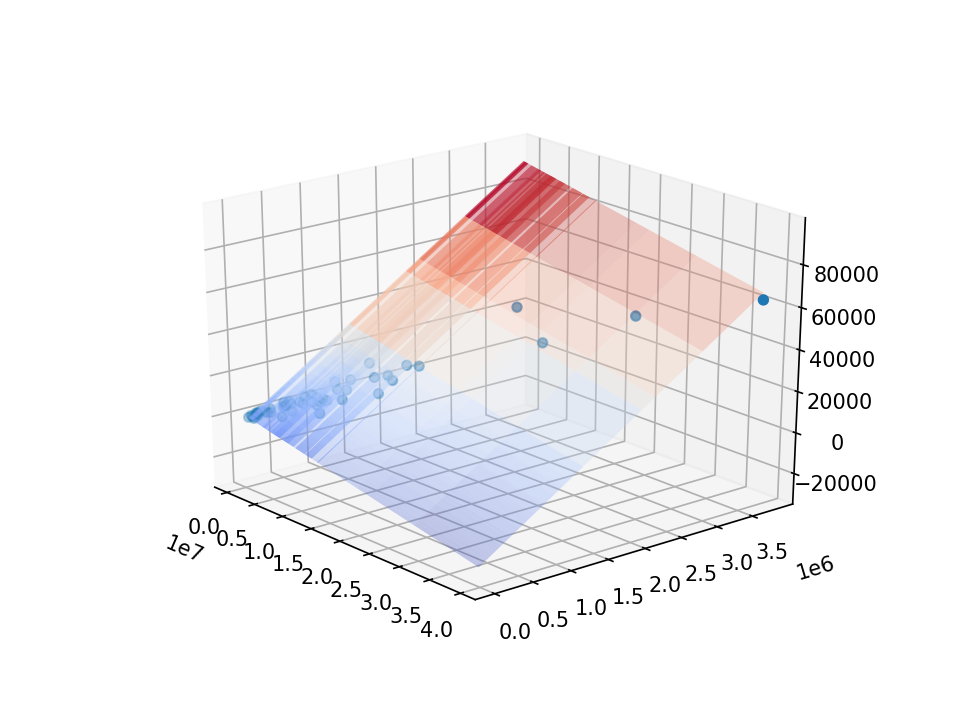

In [22]:
import matplotlib.pyplot as plt 
from matplotlib import cm 
from matplotlib.ticker import LinearLocator 
import numpy as np 
%matplotlib  notebook 

fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

X,Y = X2[:,0], X2[:,1] 
Z = y.reshape(-1,1) 


ax.scatter(X,Y,Z)

X,Y = np.meshgrid(X,Y)
Z = reg_2.coef_[0]*X + reg_2.coef_[1]*Y + reg_2.intercept_
ax.plot_surface(X,Y,Z, cmap = cm.coolwarm, alpha = 0.3) 
plt.savefig('regresion_3D.jpg')

# Modelo de regresión lineal ordinaria con tres características 

In [28]:
y = df['Total Deaths'].values  
X3 = df[['Population', 'Total Cases','Total Recovered']].values.reshape(-1,3) 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X3, y, random_state = 702) 
reg_3 = LinearRegression()
reg_3.fit(X_train,y_train) 
reg_3.score(X_train, y_train), reg_3.score(X_test, y_test) 

(0.9570639673889659, 0.8205276677645963)

# Modelo de regresión lineal ordinaria con cuatro características 

In [26]:
df.keys()  

Index(['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases',
       'Total Cases.1', 'Population'],
      dtype='object')

In [30]:
y = df['Total Deaths'].values  
X4 = df[['Population', 'Total Cases','Total Recovered','Active Cases']].values.reshape(-1,4) 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X4, y, random_state = 702) 
reg_3 = LinearRegression()
reg_3.fit(X_train,y_train) 
reg_3.score(X_train, y_train), reg_3.score(X_test, y_test) 

(0.9571870168416237, 0.8234595745109275)

# Modelo de regresión lineal ordinaria con cinco características 

In [31]:
y = df['Total Deaths'].values  
X5 = df[['Population', 'Total Cases','Total Recovered',
         'Active Cases','Total Cases.1']].values.reshape(-1,5) 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X5, y, random_state = 702) 
reg_3 = LinearRegression()
reg_3.fit(X_train,y_train) 
reg_3.score(X_train, y_train), reg_3.score(X_test, y_test) 

(0.9770064369506362, 0.8721666835513071)